<a href="https://colab.research.google.com/github/kabaiban/test/blob/master/assessment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rJaava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("Rwordseg",repos="http://R-Forge.R-project.org")
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rJaava’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is no

In [2]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)
library(showtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer

Loading required package: sysfonts

Loading required package: showtextdb



In [23]:
content <- "沒有了聯絡後來的生活我都是聽別人說說妳怎麼了說妳怎麼過放不下的人是我人多的時候就待在角落就怕別人問起我你們怎麼了妳低著頭護著我連抱怨都沒有電話開始躲從不對我說不習慣一個人生活離開我以後要我好好過怕打擾想自由的我都這個時候妳還在意著別人是怎麼怎麼看我的拼命解釋著不是我的錯是妳要走眼看著妳難過挽留的話卻沒有說妳會微笑放手說好不哭讓我走電話開始躲從不對我說不習慣一個人生活離開我以後要我好好過怕打擾想自由的我都這個時候你還在意著別人是怎麼怎麼看我的拼命解釋著不是我的錯是妳要走眼看著妳難過挽留的話卻沒有說妳會微笑放手說好不哭讓我走你什麼都沒有卻還為我的夢加油心疼過了多久還在找理由等我你住的巷子裡我租了一間公寓為了想與你不期而遇高中三年我為什麼為什麼不好好讀書沒考上跟你一樣的大學我找了份工作離你宿舍很近當我開始學會做蛋餅才發現你不吃早餐你又擦肩而過你耳機聽什麼能不能告訴我躺在你學校的操場看星空教室裡的燈還亮著你沒走記得我寫給你的情書都什麼年代了到現在我還在寫著總有一天總有一年會發現有人默默的陪在你的身邊也許我不該在你的世界當你收到情書也代表我已經走遠學校旁的廣場我在這等鐘聲響等你下課一起走好嗎彈著琴唱你愛的歌暗戀一點都不痛苦痛苦的是你根本沒看我我唱這麼走心卻走不進你心裡在人來人往找尋著你守護著你不求結局你又擦肩而過我唱告白氣球終於你回了頭躺在你學校的操場看星空教室裡的燈還亮著你沒走記得我寫給你的情書都什麼年代了到現在我還在寫著總有一天總有一年會發現有人默默的陪在你的身邊也許我不該在你的世界當你收到情書也代表我已經走遠
"

cutter <- worker(bylines = F)
content <- str_remove_all(content,"[0-9a-zA-Z]+?")

new_words <- c("一個人")
writeLines(new_words, "new_words.txt")
stop_words <- c("我","你","的","著","在","了","妳","都","是","說","不","卻","要","也","又","就","會","的話","妳會","過怕","到","還亮","人","沒")
writeLines(stop_words, "stop_words.txt")
cutter[content]
cutter <- worker(user = "new_words.txt",stop_word = "stop_words.txt",bylines = FALSE)
seg_words <- cutter[content]
txt_freq <- freq(seg_words)
txt_freq <- arrange(txt_freq,desc(freq))
head(txt_freq)

[1] "沒有"     "了"       "聯絡"     "後來"     "的"       "生活"    
  [7] "我"       "都"       "是"       "聽"       "別人"     "說"      
 [13] "說"       "妳"       "怎麼"     "了"       "說"       "妳"      
 [19] "怎麼"     "過"       "放不下"   "的"       "人"       "是"      
 [25] "我"       "人"       "多"       "的"       "時候"     "就"      
 [31] "待"       "在"       "角落"     "就"       "怕"       "別人"    
 [37] "問起"     "我"       "你們"     "怎麼"     "了"       "妳"      
 [43] "低"       "著頭護"   "著"       "我連"     "抱怨"     "都"      
 [49] "沒有"     "電話"     "開始"     "躲"       "從不"     "對"      
 [55] "我"       "說"       "不"       "習慣"     "一個"     "人"      
 [61] "生活"     "離開"     "我"       "以後"     "要"       "我"      
 [67] "好好"     "過怕"     "打擾"     "想"       "自由"     "的"      
 [73] "我"       "都"       "這個"     "時候"     "妳"       "還"      
 [79] "在意"     "著"       "別人"     "是"       "怎麼"     "怎麼"    
 [85] "看"       "我"       "的"       "拼命"     "解釋"     "著"      
 [91] "不是"     "我"       "的"       "錯"       "是"       "妳"      
 [97] "要"       "走"       "眼看"     "著"       "妳"       "難過"    
[103] "挽留"     "的話"     "卻"       "沒有"     "說"       "妳會"    
[109] "微笑"     "放手"     "說好"     "不"       "哭"       "讓"      
[115] "我"       "走"       "電話"     "開始"     "躲"       "從不"    
[121] "對"       "我"       "說"       "不"       "習慣"     "一個"    
[127] "人"       "生活"     "離開"     "我"       "以後"     "要"      
[133] "我"       "好好"     "過怕"     "打擾"     "想"       "自由"    
[139] "的"       "我"       "都"       "這個"     "時候"     "你還"    
[145] "在意"     "著"       "別人"     "是"       "怎麼"     "怎麼"    
[151] "看"       "我"       "的"       "拼命"     "解釋"     "著"      
[157] "不是"     "我"       "的"       "錯"       "是"       "妳"      
[163] "要"       "走"       "眼看"     "著"       "妳"       "難過"    
[169] "挽留"     "的話"     "卻"       "沒有"     "說"       "妳會"    
[175] "微笑"     "放手"     "說好"     "不"       "哭"       "讓"      
[181] "我"       "走"       "你"       "什麼"     "都"       "沒有"    
[187] "卻"       "還為"     "我"       "的"       "夢"       "加油"    
[193] "心疼"     "過了"     "多久"     "還在"     "找"       "理由"    
[199] "等"       "我"       "你"       "住"       "的"       "巷子"    
[205] "裡我租"   "了"       "一間"     "公寓"     "為"       "了"      
[211] "想"       "與"       "你"       "不期而遇" "高中"     "三年"    
[217] "我"       "為"       "什麼"     "為"       "什麼"     "不"      
[223] "好好"     "讀書"     "沒考上"   "跟"       "你"       "一樣"    
[229] "的"       "大學"     "我"       "找"       "了"       "份"      
[235] "工作"     "離"       "你"       "宿舍"     "很"       "近當"    
[241] "我"       "開始"     "學會"     "做"       "蛋餅"     "才"      
[247] "發現"     "你"       "不吃"     "早餐"     "你"       "又"      
[253] "擦肩而過" "你"       "耳機"     "聽"       "什麼"     "能"      
[259] "不能"     "告訴"     "我"       "躺"       "在"       "你"      
[265] "學校"     "的"       "操場"     "看"       "星空"     "教室"    
[271] "裡的"     "燈"       "還亮"     "著"       "你"       "沒"      
[277] "走"       "記得"     "我"       "寫給"     "你"       "的"      
[283] "情書"     "都"       "什麼"     "年代"     "了"       "到"      
[289] "現在"     "我"       "還在"     "寫"       "著"       "總有一天"
[295] "總有"     "一年"     "會"       "發現"     "有人"     "默默"    
[301] "的"       "陪"       "在"       "你"       "的"       "身邊"    
[307] "也許"     "我"       "不該"     "在"       "你"       "的"      
[313] "世界"     "當你"     "收到"     "情書"     "也"       "代表"    
[319] "我"       "已經"     "走遠"     "學校"     "旁"       "的"      
[325] "廣場"     "我"       "在"       "這等"     "鐘聲"     "響"      
[331] "等"       "你"       "下課"     "一起"     "走"       "好"      
[337] "嗎"       "彈著琴"   "唱"       "你"       "愛的"     "歌"      
[343] "暗戀"     "一點"     "都"       "不"       "痛苦"     "痛苦"    
[349] "的"       "是"       "你"       "根本"     "沒看"     "我"      
[355] "我"       "唱"       "這麼"     "走心"     "卻"       "走"      
[361] "不進"     "你"       "心裡"     "在"       "人來人往" "找尋"    
[367] "著"       "你"       "守護"     "著"       "你"       "不求"    
[373] "結局"     "你"       "又"       "擦肩而過" "我"       "唱"      
[379] "告白"     "氣球"     "終於"

,char,freq
,<chr>,<dbl>
1,走,8
2,怎麼,7
3,什麼,6
4,沒有,5
5,情書,4
6,看,4


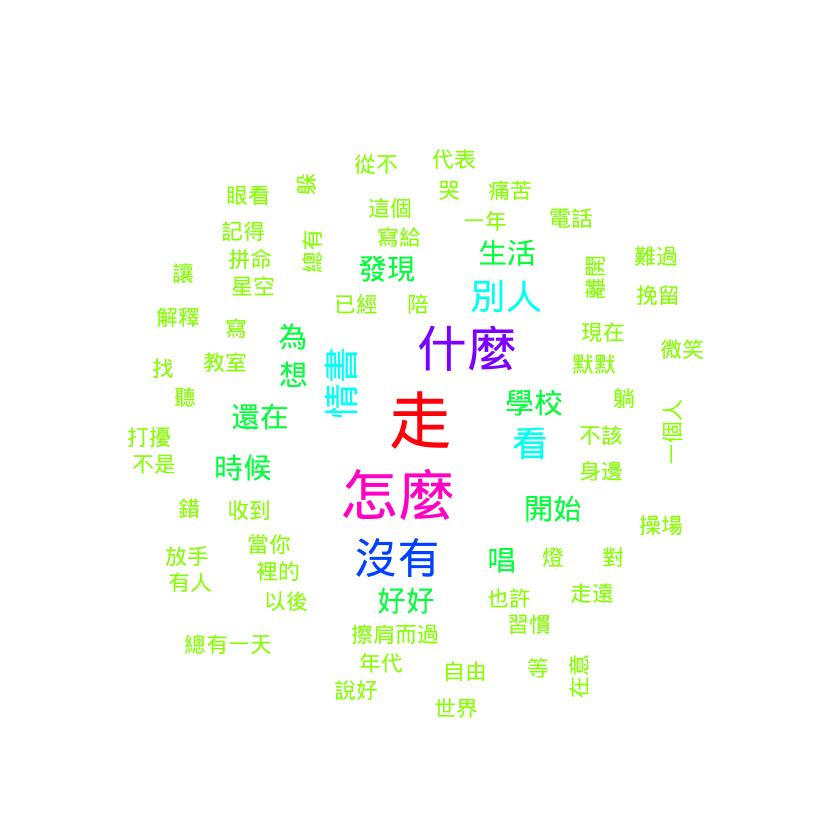

In [24]:
showtext_auto(enable = TRUE)

wordcloud(txt_freq$char,txt_freq$freq,min.freq=2,random.order=F,ordered.colors=F,colors=rainbow(nrow(txt_freq)))